In [26]:
import experiment
import neat
import numpy as np
import os
import importlib
import environment
import utils
importlib.reload(experiment)
importlib.reload(environment)
importlib.reload(utils)

<module 'utils' from '/Users/lorenzoleuzzi/Documents/GitHub/lifelong_evolutionary_swarms/utils.py'>

In [27]:
path = os.path.abspath("/Users/lorenzoleuzzi/Library/CloudStorage/OneDrive-UniversityofPisa/lifelong_evolutionary_swarms/results/results/retention_pop/neat_500_300_300_5_20_u/seed1/static3_drift34")
e = experiment.LifelongEvoSwarmExperiment()
e.load(path)
controller = neat.nn.FeedForwardNetwork.create(e.best_individual, e.config_neat)
env = e.env
seed = e.seed

Loading experiment from /Users/lorenzoleuzzi/Library/CloudStorage/OneDrive-UniversityofPisa/lifelong_evolutionary_swarms/results/results/retention_pop/neat_500_300_300_5_20_u/seed1/static3_drift34
['episode.gif', 'evolution_plot.png', 'population.pkl', 'episode_retention_top.gif', 'env.pkl', 'neat_config.pkl', 'episode_retention_population.gif', 'experiment.json', 'logbook.json', 'best_genome.pkl']


In [29]:
# Create directory for saving the results
directory = '/Users/lorenzoleuzzi/Documents/GitHub/lifelong_evolutionary_swarms/results/retention_pop/neat_500_300_300_5_20_u/seed1/static3_drift34'
os.makedirs(directory, exist_ok=True)
e.run_best(save=True) # Run the best individual on the environment and save the episode

. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . 0 . . . . 1 . . . . . . . . . .
. . . . . . . . . . . . . . . 2 . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . O . . . . . O . . . . . O . .
. . O . . . . . O . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . O . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .


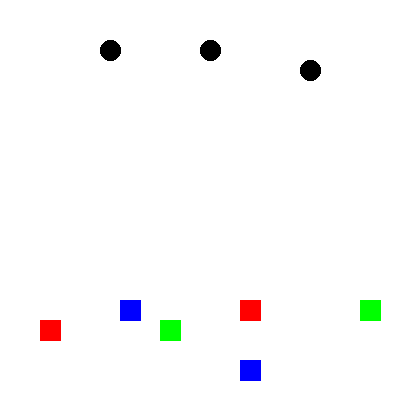

In [18]:
env.reset(seed=seed)
env.render()

In [ ]:
fitness = 0

3.0


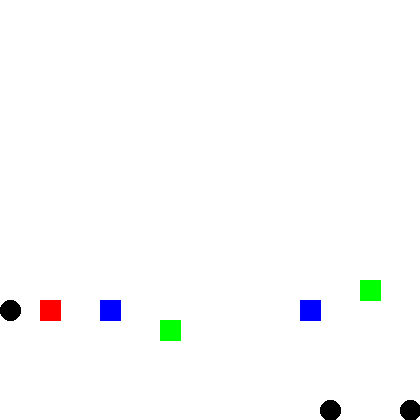

In [9]:
for i in range(1000):
    nn_inputs = env.process_observation(obs)
    # print(obs)
    # print(nn_inputs)
    nn_outputs = np.array([controller.activate(nn_input) for nn_input in nn_inputs])
    # print(nn_outputs)
    actions = (2 * nn_outputs - 1) * env.max_wheel_velocity # Scale output sigmoid in range of wheel velocity
    # env.render()
    # print(env.agents_location)
    obs, reward, done, truncated, _ = env.step(actions)
    fitness += reward
    if done or truncated:
        print(f"Done: {done}, Truncated: {truncated}, Fitness: {fitness}")
        break
print(fitness)
env.render(False)